In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
def read_file(filename):
    contents, labels = [], []
    with open(filename,encoding='utf-8') as f:
        for line in f:
            try:
                label, content = line.strip().split('\t')
                if content:
                    contents.append((content))
                    labels.append(label)
            except:
                pass
    return contents, labels

In [4]:
test_content,test_label = read_file(r'F:\NNNNNNNNNNNNNNLP\dataSet\cnews.test.txt')
train_content,train_label = read_file(r'F:\NNNNNNNNNNNNNNLP\dataSet\cnews.train.txt')
print(train_label[:10])

['体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育']


In [5]:
import re
def clear_character(sentence):
    pattern1= '\[.*?\]'     
    pattern2 = re.compile('[^\u4e00-\u9fa5^a-z^A-Z^0-9]')   
    line1=re.sub(pattern1,'',sentence)
    line2=re.sub(pattern2,'',line1)   
    new_sentence=''.join(line2.split())
    return new_sentence

In [6]:
tr_text=list(map(lambda s: clear_character(s), train_content))
te_text=list(map(lambda s: clear_character(s), test_content))
print(tr_text[1])

商瑞华首战复仇心切中国玫瑰要用美国方式攻克瑞典多曼来了瑞典来了商瑞华首战求3分的信心也来了距离首战72小时当口中国女足彻底从恐瑞症当中获得解脱因为商瑞华已经找到了瑞典人的软肋找到软肋保密4月20日奥运会分组抽签结果出来后中国姑娘就把瑞典锁定为关乎奥运成败的头号劲敌因为除了浦玮等个别老将之外现役女足将士竟然没有人尝过击败瑞典的滋味在中瑞两队共计15次交锋的历史上中国队6胜3平6负与瑞典队平分秋色但从2001年起至今近8年时间中国在同瑞典连续5次交锋中均未尝胜绩战绩为2平3负尽管八年不胜瑞典曾一度成为谢亚龙聘请多曼斯基的理由之一但这份战绩表也成为压在姑娘们身上的一座大山在奥运备战过程中越发凸显沉重或许正源于此商瑞华才在首战前3天召开了一堂完全针对恐瑞症的战术分析课3日中午在喜来登大酒店中国队租用的会议室里商瑞华给大家播放了瑞典队的比赛录像剪辑这是7月6日瑞典在主场同美国队进行的一场奥运热身赛当时美国队头牌射手瓦姆巴赫还没有受伤比赛当中双方均尽遣主力占据主场优势的瑞典队曾一度占据上风但终究还是在定位球防守上吃了亏美国队在下半场的一次角球配合中通过远射打进唯一进球尽管慢动作显示是打在瑞典队后卫腿上弹射入网但从过程到结果均显示了相同内容瑞典队的防守并非无懈可击商瑞华让科研教练曹晓东等人对这场比赛进行精心剪辑尤其是瑞典队失球以及美国队形成有威胁射门的片段更是被放大进行动作分解每一个中国姑娘都可以一目了然地看清瑞典队哪些地方有机可乘甚至之前被商瑞华称为恐怖杀手的瑞典8号谢琳也在这次战术分解过程中被发现了不足之处姑娘们心知肚明并开心享受对手软肋被找到的欢悦但却必须对记者保密某主力球员说这可不能告诉外界反正我们心里有数了知道对付这个速度奇快的谢琳该怎么办老帅的瑞典情结就像中国队8年不胜瑞典一样瑞典队也连续遭遇对美国队的溃败去年阿尔加夫杯瑞典0比1不敌美国世界杯小组赛上瑞典0比2被美国完胜今年阿尔加夫杯美国人再次击败瑞典算上7月6日一役瑞典遇到美国连平局都没有竟然是4连败3日中午的这堂战术分析课后用美国人的方式击败瑞典已经成为中国女足将士的共同心声姑娘们当然有理由这样去憧憬因为在7月30日奥运会前最后一场热身赛中中国女足便曾0比0与强大的美国队握手言和在3日中午的战术分析课上这场中美热身也被梳理出片段与姑娘们一道完成总结点评过程中商瑞华对大家在同美国队比赛中表现出来的逼抢意识给予很高评

In [7]:
import jieba
tr_seg_text=list(map(lambda s: jieba.lcut(s), tr_text))
te_seg_text=list(map(lambda s: jieba.lcut(s), te_text))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86178\AppData\Local\Temp\jieba.cache
Loading model cost 0.460 seconds.
Prefix dict has been built successfully.


去除停用词前，有834个词
去除停用词后，有518个词


In [7]:
print(tr_seg_text[1][:20])

['商瑞华', '首战', '复仇', '心切', '中国', '玫瑰', '要', '用', '美国', '方式', '攻克', '瑞典', '多曼来', '了', '瑞典', '来', '了', '商瑞华', '首战', '求']


In [8]:
# 停用词
stopwords = [] 
with open(r"F:\NNNNNNNNNNNNNNLP\dataSet\stop_words.txt",encoding='utf-8') as f:
        for line in f:
            stopwords.append(line.replace('\n', ''))
print(stopwords[:10])

['', '`', '^', '~', '<', '=', '>', '|', '_', '-']


In [9]:
#去除停用词
def drop_stopwords(line, stopwords):
    line_clean = []
    for word in line:
        if word in stopwords:
            continue
        line_clean.append(word)
    return line_clean
tr_st_text=list(map(lambda s: drop_stopwords(s,stopwords), tr_seg_text))
te_st_text=list(map(lambda s: drop_stopwords(s,stopwords), te_seg_text))
print((tr_st_text[1][:20]))

['商瑞华', '首战', '复仇', '心切', '中国', '玫瑰', '美国', '方式', '攻克', '瑞典', '多曼来', '瑞典', '商瑞华', '首战', '求', '分', '信心', '距离', '首战', '72']


In [10]:
# 以textp[1]为例，对比查看去除停用词的有效性
print("去除停用词前，有{}个词".format(len(tr_seg_text[1])))
print("去除停用词后，有{}个词".format(len(tr_st_text[1])))

去除停用词前，有834个词
去除停用词后，有518个词


In [8]:
# 做截断
from collections import Counter
def build_vocab(data_train):
    vocab_size=5000
    all_data = []
    for content in data_train:
        all_data.extend(content)

    counter = Counter(all_data)
    count_pairs = counter.most_common(vocab_size-2)
    words, _ = list(zip(*count_pairs))
    words = ['<PAD>'] +['<UNK>']+ list(words)
    return words
word_to_id1 = build_vocab(tr_st_text)
word_to_index = dict(zip(word_to_id1,range(len(word_to_id1))))
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, '都': 2, '中': 3, '月': 4, '年': 5, '一个': 6, '上': 7, '不': 8, '中国': 9, '会': 10, '说': 11, '人': 12, '基金': 13, '日': 14, '还': 15, '很': 16, '后': 17, '市场': 18, '更': 19, '时': 20, '公司': 21, '美国': 22, '记者': 23, '时间': 24, '学生': 25, '游戏': 26, '北京': 27, '投资': 28, '最': 29, '好': 30, '分': 31, '新': 32, '大': 33, '电影': 34, '10': 35, '发展': 36, '做': 37, '下': 38, '项目': 39, '很多': 40, '银行': 41, '比赛': 42, '工作': 43, '去': 44, '留学': 45, '企业': 46, '大学': 47, '经济': 48, '选择': 49, '房地产': 50, '里': 51, '情况': 52, '元': 53, '前': 54, '新浪': 55, '国际': 56, '已': 57, '国家': 58, '发现': 59, '只': 60, '却': 61, '玩家': 62, '12': 63, '再': 64, '研究': 65, '看': 66, '高': 67, '希望': 68, '亿元': 69, '想': 70, '活动': 71, '小': 72, '申请': 73, '产品': 74, '影响': 75, '设计': 76, '包括': 77, '提供': 78, '生活': 79, '出': 80, '11': 81, '城市': 82, '学校': 83, '上海': 84, '导演': 85, '世界': 86, '英国': 87, '20': 88, '表现': 89, '价格': 90, '才': 91, '政策': 92, '相关': 93, '合作': 94, '一种': 95, '资金': 96, '显示': 97, '2009': 98, '国内': 99, '政府': 100, '超过': 101, '内': 102, '方式'

In [10]:
import numpy as np
# One-Hot编码

def one_hot_encode(text, word_to_index):
    one_hot_vector = np.zeros(5000)
    for word in text:
        if word in word_to_index:
            one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

train_Data = np.array([one_hot_encode(text, word_to_index) for text in tr_st_text])
test_Data = np.array([one_hot_encode(text, word_to_index) for text in te_st_text])
print(train_Data[1])

# 标签数值化
unique_labels = list(set(train_label))
map_label = {label: i for i, label in enumerate(unique_labels)}
# print(map_label)
label_train_id = np.array([map_label[label] for label in train_label])

[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1.]
{'娱乐': 0, '时尚': 1, '家居': 2, '财经': 3, '体育': 4, '房产': 5, '游戏': 6, '时政': 7, '科技': 8, '教育': 9}


In [11]:
print(map_label)
reversed_map_label = {value: key for key, value in map_label.items()}
print(reversed_map_label)

{'娱乐': 0, '时尚': 1, '家居': 2, '财经': 3, '体育': 4, '房产': 5, '游戏': 6, '时政': 7, '科技': 8, '教育': 9}
{0: '娱乐', 1: '时尚', 2: '家居', 3: '财经', 4: '体育', 5: '房产', 6: '游戏', 7: '时政', 8: '科技', 9: '教育'}


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, metrics

classifier = LogisticRegression()
classifier.fit(train_Data, label_train_id)
pred1 = classifier.predict(test_Data)
predicted1 = [reversed_map_label[pred] for pred in pred1]
print(metrics.classification_report(test_label, predicted1))

              precision    recall  f1-score   support

          体育       1.00      1.00      1.00      1000
          娱乐       0.99      0.98      0.98      1000
          家居       0.95      0.84      0.89      1000
          房产       0.98      0.96      0.97      1000
          教育       0.94      0.88      0.91      1000
          时尚       0.94      0.98      0.96      1000
          时政       0.94      0.96      0.95      1000
          游戏       0.93      0.97      0.95      1000
          科技       0.93      0.97      0.95      1000
          财经       0.95      0.99      0.97      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



d:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
predicted1 = [reversed_map_label[pred] for pred in pred1]
print(predicted1)

['体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育

In [21]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, metrics
print(metrics.classification_report(test_label, predicted1))

              precision    recall  f1-score   support

          体育       1.00      1.00      1.00      1000
          娱乐       0.99      0.98      0.98      1000
          家居       0.95      0.84      0.89      1000
          房产       0.98      0.96      0.97      1000
          教育       0.94      0.88      0.91      1000
          时尚       0.94      0.98      0.96      1000
          时政       0.94      0.96      0.95      1000
          游戏       0.93      0.97      0.95      1000
          科技       0.93      0.97      0.95      1000
          财经       0.95      0.99      0.97      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

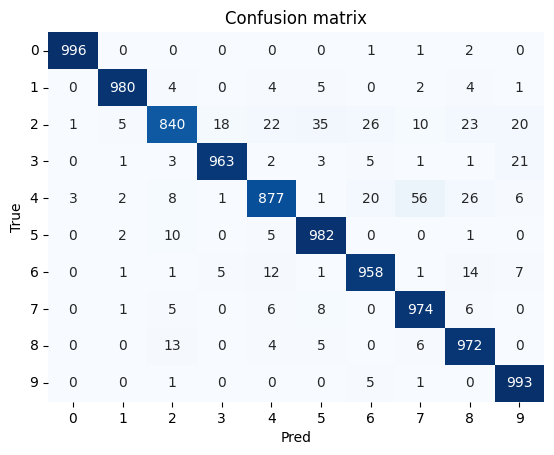

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

classes = np.unique(test_label)
cm = metrics.confusion_matrix(test_label, predicted1)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
plt.yticks(rotation=0)